<a href="https://colab.research.google.com/github/justinstayy/TradeOpenness/blob/main/FInalPythonCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd

#Uploading the Excel File Manually
df = pd.read_excel('Data.xlsx', sheet_name=0)

#Using df head to preview first 5 rows.
df.head()



Saving Data.xlsx to Data (1).xlsx


,Country Name,Country Code,Series Name,Series Code,1999 [YR1999],2001 [YR2001],2000 [YR2000],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
0,Germany,DEU,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,0.585433,1.983857,1.440268,1.420806,1.034222,1.665737,1.546911,1.577426,0.491747,1.509495,1.732169,1.445660,0.144878,3.066667,6.872574
1,Germany,DEU,Trade (% of GDP),NE.TRD.GNFS.ZS,51.519227,59.559286,59.195599,58.332569,58.914544,62.906491,66.953102,72.759193,75.984588,77.566637,79.227660,79.133747,72.993257,80.156618,89.064127
2,Germany,DEU,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2.130117,1.636541,2.877246,-0.228310,-0.529929,1.162368,0.885697,3.855736,2.294711,2.716025,1.116443,0.987893,-4.095137,3.670000,1.369731
3,Germany,DEU,"Foreign direct investment, net inflows (% of GDP)",BX.KLT.DINV.WD.GD.ZS,3.886205,2.896109,12.608532,2.438614,2.580231,-0.715503,2.067994,2.870496,1.643196,2.890881,4.004210,1.906987,4.486666,2.349165,1.506606
4,Germany,DEU,General government final consumption expenditu...,NE.CON.GOVT.KD.ZG,1.238667,0.546178,1.614530,1.209877,0.731886,-0.593364,0.596906,1.114070,4.039999,1.662822,0.803631,2.644908,4.111842,3.124451,1.565958


In [ ]:
#Here we are converting our data from wide to long format
df_long = df.melt(id_vars=['Country Name', 'Country Code', 'Series Name'],
                  var_name='Year', value_name='Value')

#HEre we are ensuring that the value in the column is numeric
df_long['Value'] = pd.to_numeric(df_long['Value'], errors='coerce')

#Extracting only the numeric year from collumn names.
df_long['Year'] = df_long['Year'].str.extract('(\d+)')
df_long = df_long.dropna(subset=['Year'])
df_long['Year'] = df_long['Year'].astype(int)

#Filtering to keep only 1999–2022
df_long = df_long[(df_long['Year'] >= 1999) & (df_long['Year'] <= 2022)]

#Converting our series into separate columns. Now each row--> One country -year observation
df_pivot = df_long.pivot_table(
    index=['Country Name', 'Country Code', 'Year'],
    columns='Series Name',
    values='Value'
).reset_index()

#Renaming collumns for simplicity
df_pivot.columns.name = None
df_pivot.rename(columns={
    'Country Name': 'Country',
    'Country Code': 'Code',
    'Inflation, consumer prices (annual %)': 'Inflation',
    'Trade (% of GDP)': 'Trade'
}, inplace=True)


df_pivot = df_pivot.sort_values(by=['Country', 'Year'])
df_pivot.head()

,Country,Code,Year,"Foreign direct investment, net inflows (% of GDP)",GDP growth (annual %),General government final consumption expenditure (annual % growth),Gross fixed capital formation (% of GDP),Households and NPISHs final consumption expenditure (% of GDP),Inflation,Net barter terms of trade index (2015 = 100),"Official exchange rate (LCU per US$, period average)",Trade,"Unemployment, total (% of total labor force) (modeled ILO estimate)"
0,Austria,AUT,1999,1.374399,3.761924,3.259876,25.079147,53.839368,0.568994,NaN,0.938283,78.562933,4.699
1,Austria,AUT,2000,4.333237,3.189523,0.231786,25.706050,54.170946,2.344863,113.609813,1.082705,85.842608,4.687
2,Austria,AUT,2001,2.895722,1.316988,-0.346602,24.927913,54.395256,2.650001,112.264689,1.116533,87.996257,4.007
3,Austria,AUT,2002,0.065001,1.484369,0.797068,23.623077,53.931739,1.810358,112.428144,1.057559,87.584494,4.852
4,Austria,AUT,2003,2.375576,1.141565,1.018662,24.194121,54.393178,1.355554,111.257209,0.884048,86.882226,4.779


In [ ]:
#Creating a list with names of countries that use the euro.(Eurozone)
eurozone_countries = [
    'Austria', 'Belgium', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
    'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Netherlands', 'Portugal', 'Slovak Republic', 'Slovenia', 'Spain'
]

#Now for each row in the country collumn, we check--> If the country is in the Eurozone -1, otherwise 0.
df_pivot['EuroDummy'] = df_pivot['Country'].apply(lambda x: 1 if x in eurozone_countries else 0)

# Step 3: Check the result
df_pivot[['Country', 'EuroDummy']].drop_duplicates().sort_values('Country').reset_index(drop=True)


,Country,EuroDummy
0,Austria,1
1,Belgium,1
2,Croatia,0
3,Czechia,0
4,Estonia,1
5,Finland,1
6,France,1
7,Germany,1
8,Greece,1
9,Hungary,0


In [ ]:
#Ensuring that each country's yearly data is in order , which is basically essential for correct lag creation
df_pivot = df_pivot.sort_values(by=['Country', 'Year'])

#Creating Lagged_Inflation variable
df_pivot['Lagged_Inflation'] = df_pivot.groupby('Country')['Inflation'].shift(1)

#Printing the results
df_pivot[['Country', 'Year', 'Inflation', 'Lagged_Inflation']].head(10)


,Country,Year,Inflation,Lagged_Inflation
0,Austria,1999,0.568994,NaN
1,Austria,2000,2.344863,0.568994
2,Austria,2001,2.650001,2.344863
3,Austria,2002,1.810358,2.650001
4,Austria,2003,1.355554,1.810358
5,Austria,2004,2.061206,1.355554
6,Austria,2005,2.299138,2.061206
7,Austria,2006,1.441549,2.299138
8,Austria,2016,0.891592,1.441549
9,Austria,2017,2.081269,0.891592


In [ ]:
# Drop rows where Lagged_Inflation is missing
df_pivot_cleaned = df_pivot.dropna(subset=['Lagged_Inflation'])
# Save to CSV without downloading
df_pivot_cleaned.to_csv('Complete_table.csv', index=False)


In [ ]:
import pandas as pd

#Loading our data set.
df = pd.read_csv('Complete_table.csv')

#Definning essential variables with corrected column names
essential_vars = [
    'Inflation',
    'Lagged_Inflation',
    'Trade',
    'GDP growth (annual %)',
    'Foreign direct investment, net inflows (% of GDP)',
    'General government final consumption expenditure (annual % growth)',
    'Net barter terms of trade index (2015 = 100)',
    'Unemployment, total (% of total labor force) (modeled ILO estimate)',
    'Gross fixed capital formation (% of GDP)',
    'Households and NPISHs final consumption expenditure (% of GDP)',
    'Official exchange rate (LCU per US$, period average)',
    'EuroDummy'
]

#Dropping rows with missing data in essential variables
panel_clean = df.dropna(subset=essential_vars)

#Removing the year 22.
panel_clean = panel_clean[panel_clean['Year'] < 2022]

#Saving our new table
panel_clean.to_csv('table2.csv', index=False)


print(f"Final panel shape: {panel_clean.shape}")
panel_clean.head()






Final panel shape: (260, 15)


,Country,Code,Year,"Foreign direct investment, net inflows (% of GDP)",GDP growth (annual %),General government final consumption expenditure (annual % growth),Gross fixed capital formation (% of GDP),Households and NPISHs final consumption expenditure (% of GDP),Inflation,Net barter terms of trade index (2015 = 100),"Official exchange rate (LCU per US$, period average)",Trade,"Unemployment, total (% of total labor force) (modeled ILO estimate)",EuroDummy,Lagged_Inflation
0,Austria,AUT,2000,4.333237,3.189523,0.231786,25.706050,54.170946,2.344863,113.609813,1.082705,85.842608,4.687,1,0.568994
1,Austria,AUT,2001,2.895722,1.316988,-0.346602,24.927913,54.395256,2.650001,112.264689,1.116533,87.996257,4.007,1,2.344863
2,Austria,AUT,2002,0.065001,1.484369,0.797068,23.623077,53.931739,1.810358,112.428144,1.057559,87.584494,4.852,1,2.650001
3,Austria,AUT,2003,2.375576,1.141565,1.018662,24.194121,54.393178,1.355554,111.257209,0.884048,86.882226,4.779,1,1.810358
4,Austria,AUT,2004,1.064017,2.565255,1.537673,23.768247,54.266472,2.061206,109.823138,0.803922,91.474220,5.969,1,1.355554


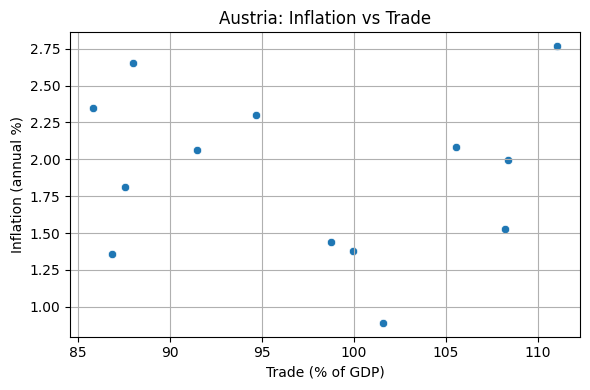

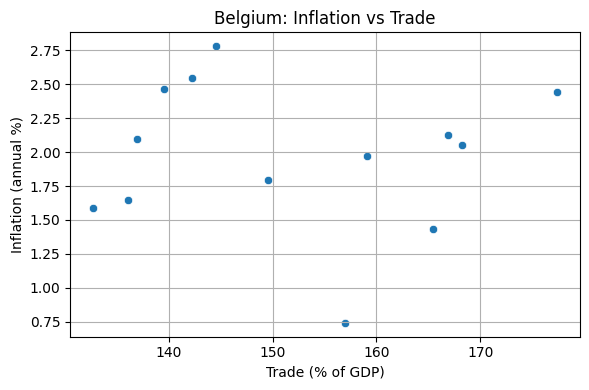

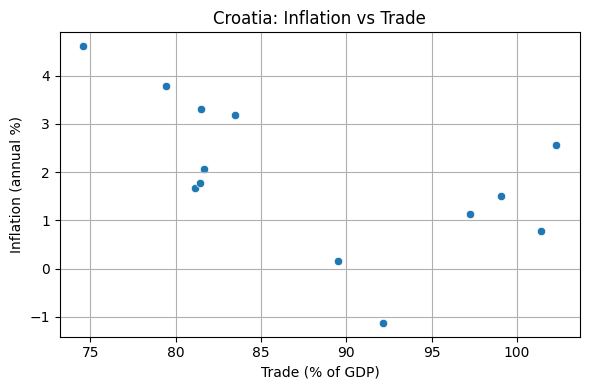

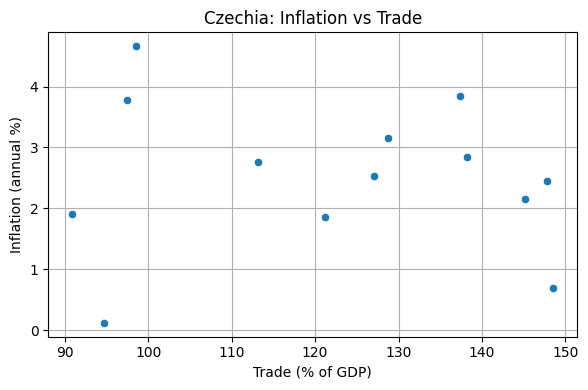

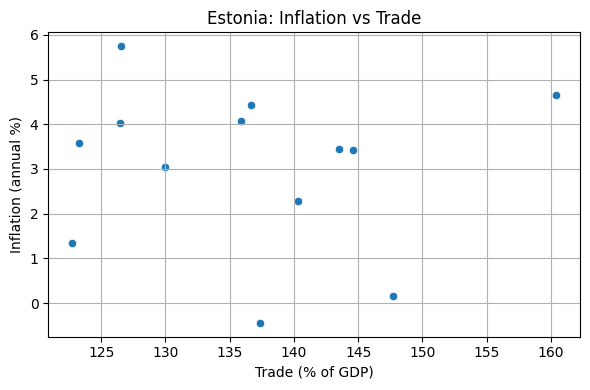

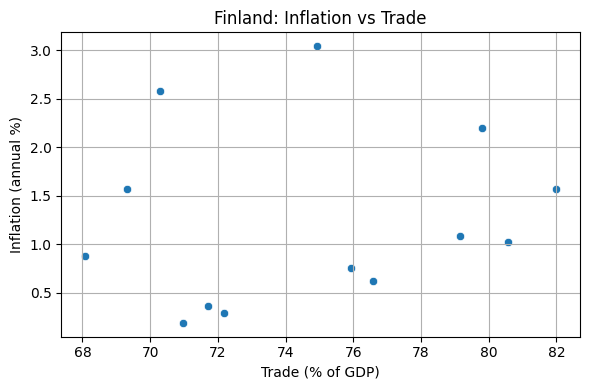

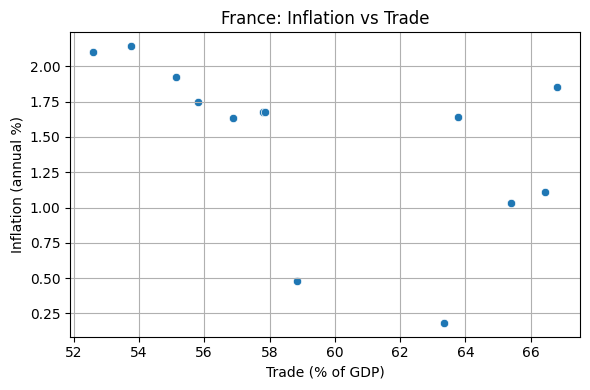

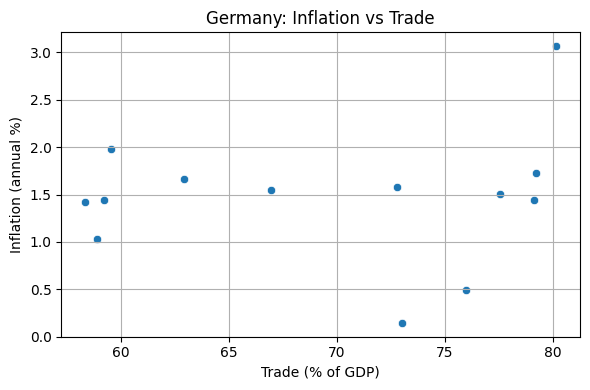

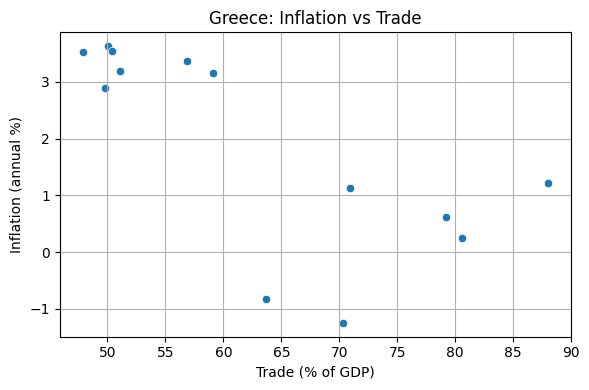

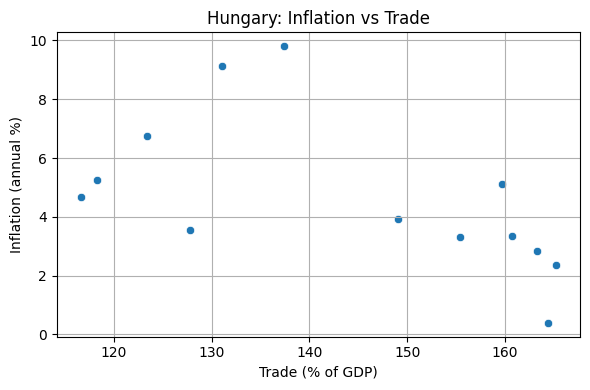

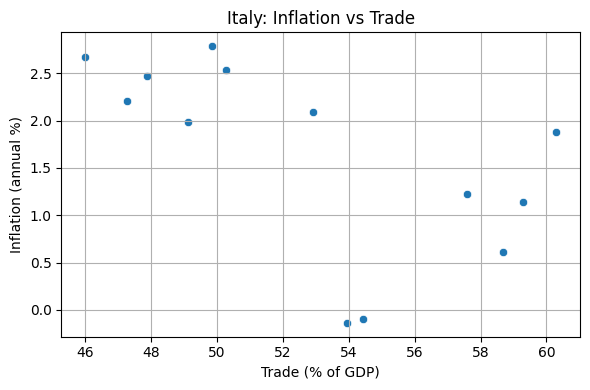

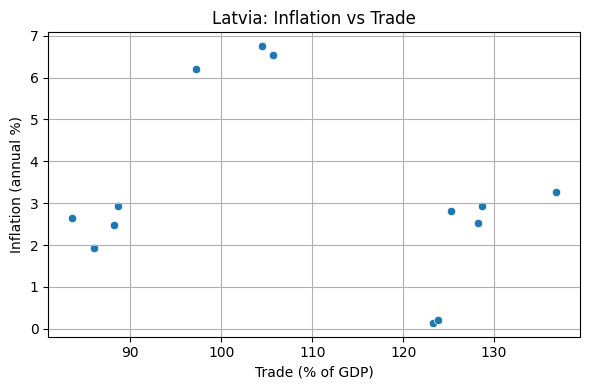

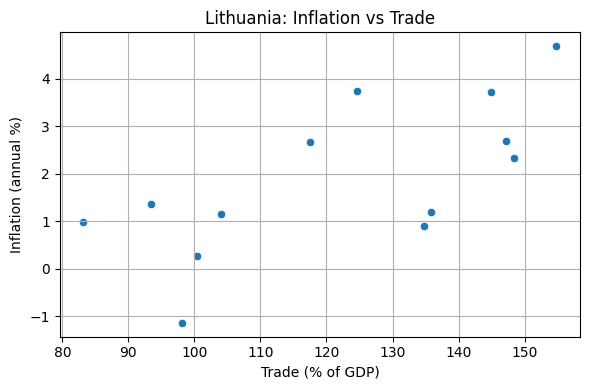

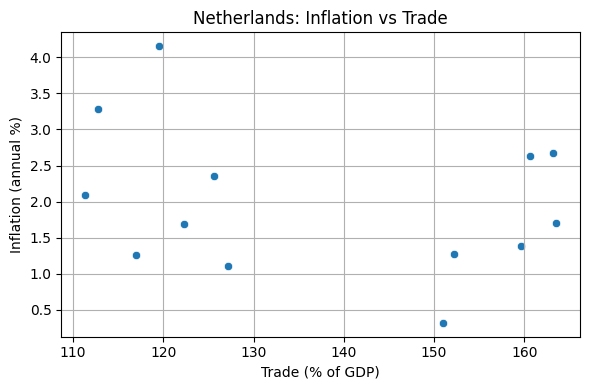

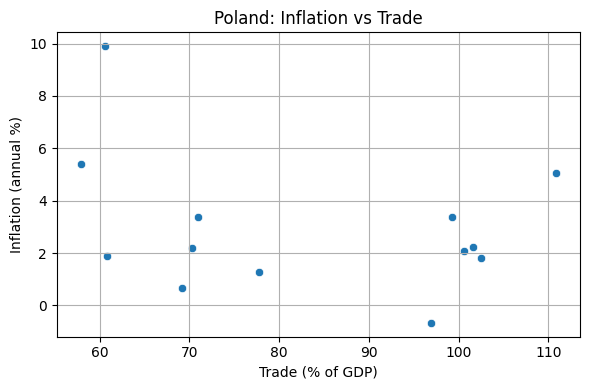

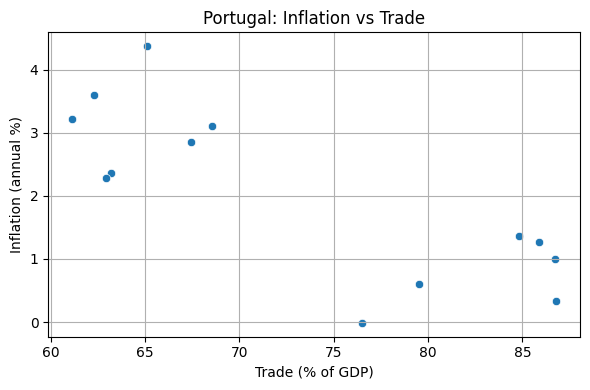

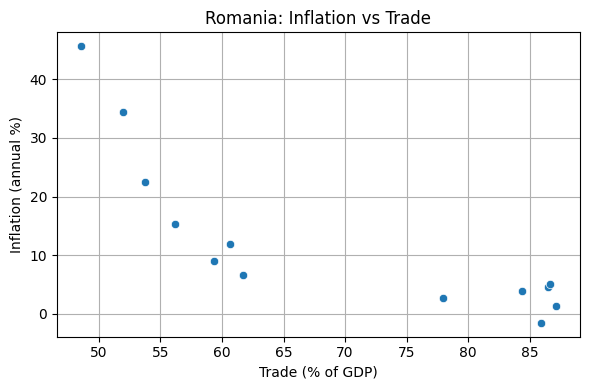

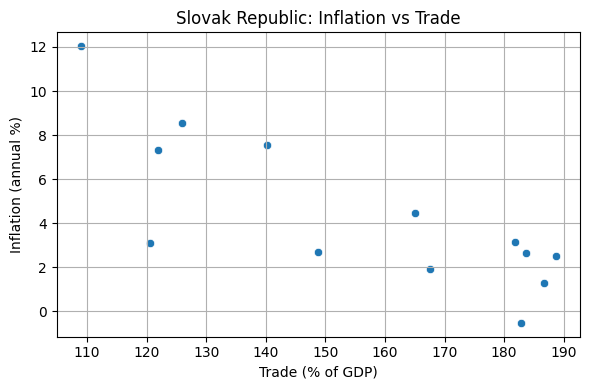

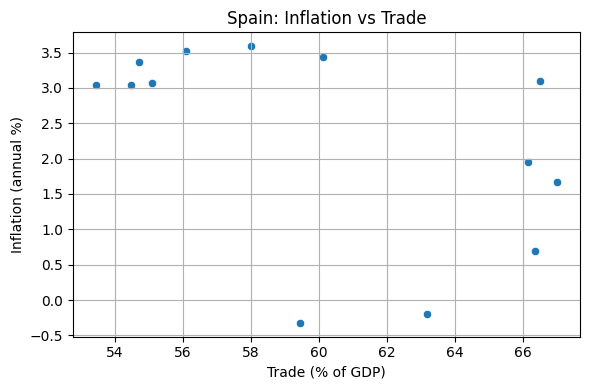

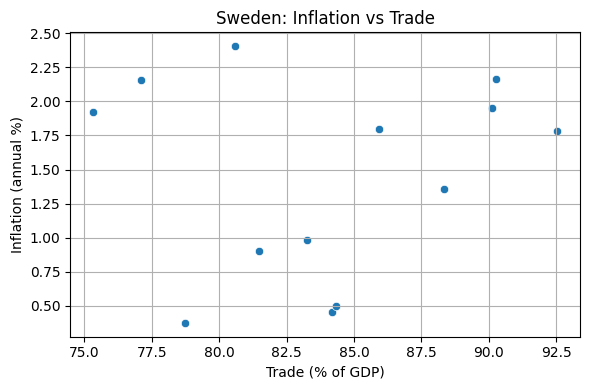

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#Getting a list of countries
countries = panel_clean['Country'].unique()

#PlottingTrade vs. Inflation for each country
for country in countries:
    subset = panel_clean[panel_clean['Country'] == country]
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=subset, x='Trade', y='Inflation')
    plt.title(f"{country}: Inflation vs Trade")
    plt.xlabel('Trade (% of GDP)')
    plt.ylabel('Inflation (annual %)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:
#Creating a list of numeric collumns we are analyzing
corr_vars = [
    'Inflation',
    'Trade',
    'Lagged_Inflation',
    'GDP growth (annual %)',
    'Foreign direct investment, net inflows (% of GDP)',
    'General government final consumption expenditure (annual % growth)',
    'Net barter terms of trade index (2015 = 100)',
    'Unemployment, total (% of total labor force) (modeled ILO estimate)',
    'Official exchange rate (LCU per US$, period average)'
]

#Pearson correlation- Measures linear association between variables(0-1)
print(" Pearson Correlation:")
display(panel_clean[corr_vars].corr(method='pearson').round(2))

#Measures ranked correlation, but here we dont assume linearity
print(" Spearman Correlation:")
display(panel_clean[corr_vars].corr(method='spearman').round(2))

pearson_corr = panel_clean[corr_vars].corr(method='pearson').round(2)
spearman_corr = panel_clean[corr_vars].corr(method='spearman').round(2)

#Saving the Matrices
with pd.ExcelWriter('correlation_matrices.xlsx') as writer:
    pearson_corr.to_excel(writer, sheet_name='Pearson')
    spearman_corr.to_excel(writer, sheet_name='Spearman')


 Pearson Correlation:


,Inflation,Trade,Lagged_Inflation,GDP growth (annual %),"Foreign direct investment, net inflows (% of GDP)",General government final consumption expenditure (annual % growth),Net barter terms of trade index (2015 = 100),"Unemployment, total (% of total labor force) (modeled ILO estimate)","Official exchange rate (LCU per US$, period average)"
Inflation,1.00,-0.08,0.91,0.21,0.02,-0.14,-0.21,-0.02,0.11
Trade,-0.08,1.00,-0.11,0.15,0.20,0.08,-0.00,-0.33,0.28
Lagged_Inflation,0.91,-0.11,1.00,0.09,0.01,-0.21,-0.21,0.02,0.10
GDP growth (annual %),0.21,0.15,0.09,1.00,0.04,0.22,-0.04,0.09,0.07
"Foreign direct investment, net inflows (% of GDP)",0.02,0.20,0.01,0.04,1.00,0.05,0.12,-0.09,0.31
General government final consumption expenditure (annual % growth),-0.14,0.08,-0.21,0.22,0.05,1.00,0.10,-0.05,0.08
Net barter terms of trade index (2015 = 100),-0.21,-0.00,-0.21,-0.04,0.12,0.10,1.00,0.04,-0.00
"Unemployment, total (% of total labor force) (modeled ILO estimate)",-0.02,-0.33,0.02,0.09,-0.09,-0.05,0.04,1.00,-0.13
"Official exchange rate (LCU per US$, period average)",0.11,0.28,0.10,0.07,0.31,0.08,-0.00,-0.13,1.00


 Spearman Correlation:


,Inflation,Trade,Lagged_Inflation,GDP growth (annual %),"Foreign direct investment, net inflows (% of GDP)",General government final consumption expenditure (annual % growth),Net barter terms of trade index (2015 = 100),"Unemployment, total (% of total labor force) (modeled ILO estimate)","Official exchange rate (LCU per US$, period average)"
Inflation,1.00,0.08,0.50,0.42,0.25,0.26,0.03,-0.09,0.22
Trade,0.08,1.00,0.01,0.22,0.34,0.08,0.02,-0.41,0.21
Lagged_Inflation,0.50,0.01,1.00,0.05,0.14,0.16,0.14,0.02,0.28
GDP growth (annual %),0.42,0.22,0.05,1.00,0.31,0.32,-0.10,0.14,0.20
"Foreign direct investment, net inflows (% of GDP)",0.25,0.34,0.14,0.31,1.00,0.11,0.14,-0.07,0.30
General government final consumption expenditure (annual % growth),0.26,0.08,0.16,0.32,0.11,1.00,0.07,-0.03,0.08
Net barter terms of trade index (2015 = 100),0.03,0.02,0.14,-0.10,0.14,0.07,1.00,0.04,0.07
"Unemployment, total (% of total labor force) (modeled ILO estimate)",-0.09,-0.41,0.02,0.14,-0.07,-0.03,0.04,1.00,-0.06
"Official exchange rate (LCU per US$, period average)",0.22,0.21,0.28,0.20,0.30,0.08,0.07,-0.06,1.00


In [ ]:
# Summary stats per country
summary = panel_clean.groupby('Country')[['Inflation', 'Trade', 'Lagged_Inflation']].describe().round(2)
from IPython.display import display
display(summary)


Inflation                                               Trade  \
                    count   mean    std   min   25%   50%    75%    max count   
Country                                                                         
Austria              13.0   1.89   0.55  0.89  1.44  2.00   2.30   2.77  13.0   
Belgium              13.0   1.98   0.55  0.74  1.65  2.05   2.44   2.78  13.0   
Croatia              13.0   1.95   1.56 -1.13  1.13  1.77   3.19   4.61  13.0   
Czechia              13.0   2.52   1.24  0.12  1.90  2.53   3.16   4.66  13.0   
Estonia              13.0   3.06   1.79 -0.44  2.28  3.44   4.08   5.75  13.0   
Finland              13.0   1.24   0.90  0.19  0.62  1.02   1.57   3.04  13.0   
France               13.0   1.48   0.60  0.18  1.11  1.68   1.85   2.14  13.0   
Germany              13.0   1.47   0.70  0.14  1.42  1.51   1.67   3.07  13.0   
Greece               13.0   1.88   1.77 -1.25  0.63  2.90   3.37   3.63  13.0   
Hungary              13.0   4.65   2.63  0.39  3.33  3.93   5.27   9.80  13.0   
Italy                13.0   1.64   1.01 -0.14  1.14  1.99   2.47   2.79  13.0   
Latvia               13.0   3.19   2.12  0.14  2.49  2.81   3.28   6.75  13.0   
Lithuania            13.0   1.89   1.60 -1.13  0.98  1.37   2.70   4.68  13.0   
Netherlands          13.0   1.99   1.02  0.32  1.27  1.70   2.63   4.16  13.0   
Poland               13.0   2.97   2.65 -0.66  1.81  2.18   3.38   9.90  13.0   
Portugal             13.0   2.03   1.37 -0.01  0.99  2.28   3.11   4.37  13.0   
Romania              13.0  12.41  14.00 -1.54  3.83  6.56  15.27  45.67  13.0   
Slovak Republic      13.0   4.37   3.49 -0.52  2.51  3.13   7.33  12.04  13.0   
Spain                13.0   2.30   1.42 -0.32  1.67  3.04   3.37   3.59  13.0   
Sweden               13.0   1.44   0.72  0.37  0.90  1.78   1.95   2.41  13.0   

                         ...                 Lagged_Inflation                \
                   mean  ...     75%     max            count   mean    std   
Country                  ...                                                  
Austria           97.53  ...  105.56  111.03             13.0   1.72   0.60   
Belgium          151.97  ...  165.47  177.39             13.0   1.87   0.57   
Croatia           88.07  ...   97.22  102.31             13.0   2.06   1.66   
Czechia          122.21  ...  138.15  148.55             13.0   2.39   1.18   
Estonia          136.58  ...  143.49  160.39             13.0   2.95   1.73   
Finland           74.73  ...   79.14   82.00             13.0   1.16   0.86   
France            59.57  ...   63.79   66.80             13.0   1.39   0.65   
Germany           69.51  ...   77.57   80.16             13.0   1.28   0.55   
Greece            62.91  ...   70.88   88.01             13.0   1.99   1.77   
Hungary          144.03  ...  160.75  165.23             13.0   5.03   3.03   
Italy             52.89  ...   57.58   60.30             13.0   1.63   1.01   
Latvia           109.23  ...  125.29  136.79             13.0   3.12   2.13   
Lithuania        122.08  ...  144.92  154.81             13.0   1.59   1.39   
Netherlands      137.37  ...  159.65  163.56             13.0   1.95   1.01   
Poland            83.01  ...  100.57  110.87             13.0   3.13   2.85   
Portugal          73.15  ...   84.81   86.77             13.0   2.11   1.35   
Romania           69.27  ...   85.89   87.16             13.0  15.55  16.54   
Slovak Republic  155.59  ...  182.76  188.73             13.0   4.94   3.86   
Spain             60.05  ...   66.17   67.01             13.0   2.24   1.40   
Sweden            84.01  ...   88.33   92.52             13.0   1.31   0.73   

                                                 
                  min   25%   50%    75%    max  
Country                                          
Austria          0.57  1.38  1.81   2.08   2.65  
Belgium          0.74  1.59  1.97   2.13   2.78  
Croatia         -1.13  1.13  1.77   3.32   4.61  
Czechia          0.12  1.90  2.45 

In [ ]:
!pip install linearmodels


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 2.8 MB/s eta 0:00:00


In [ ]:

import statsmodels.api as sm
from linearmodels.panel import PanelOLS



#Setting Country and Year as a multi-index , which is a required format for the PanelOLS
panel_df = panel_clean.set_index(['Country', 'Year'])

#Defining Independent Variables
X = panel_df[['Trade', 'Lagged_Inflation',
              'GDP growth (annual %)',
              'Foreign direct investment, net inflows (% of GDP)',
              'General government final consumption expenditure (annual % growth)',
              'Official exchange rate (LCU per US$, period average)'
             ]]

#Adding constant
X = sm.add_constant(X)

#Dependent variable
y = panel_df['Inflation']


#Estimating the fixed effects model.
model = PanelOLS(y, X, entity_effects=True, time_effects=True)
results = model.fit(cov_type='clustered', cluster_entity=True)


print(results.summary)


                          PanelOLS Estimation Summary                           
Dep. Variable:              Inflation   R-squared:                        0.8371
Estimator:                   PanelOLS   R-squared (Between):              0.9855
No. Observations:                 260   R-squared (Within):               0.7554
Date:                Tue, May 27 2025   R-squared (Overall):              0.8314
Time:                        21:38:34   Log-likelihood                   -420.58
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      190.18
Entities:                          20   P-value                           0.0000
Avg Obs:                       13.000   Distribution:                   F(6,222)
Min Obs:                       13.000                                           
Max Obs:                       13.000   F-statistic (robust):             438.07
                            

In [ ]:

import statsmodels.api as sm
from linearmodels.panel import PanelOLS



#Setting Country and Year as a multi-index , which is a required format for the PanelOLS
panel_df = panel_clean.set_index(['Country', 'Year'])

#Defining Independent Variables
X = panel_df[['Trade', 'Lagged_Inflation',
              'GDP growth (annual %)',
              'Foreign direct investment, net inflows (% of GDP)',
              'General government final consumption expenditure (annual % growth)',
              'Official exchange rate (LCU per US$, period average)'
             ]]

#Adding a constant term
X = sm.add_constant(X)

#Defining our dependent variable, now the model will estimate how trade and other variables affect inflation.
y = panel_df['Inflation']


#Estimating the fixed effects model.
model = PanelOLS(y, X, entity_effects=True, time_effects=True)
results = model.fit(cov_type='clustered', cluster_entity=True)


print(results.summary)


                          PanelOLS Estimation Summary                           
Dep. Variable:              Inflation   R-squared:                        0.8371
Estimator:                   PanelOLS   R-squared (Between):              0.9855
No. Observations:                 260   R-squared (Within):               0.7554
Date:                Tue, May 27 2025   R-squared (Overall):              0.8314
Time:                        21:38:36   Log-likelihood                   -420.58
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      190.18
Entities:                          20   P-value                           0.0000
Avg Obs:                       13.000   Distribution:                   F(6,222)
Min Obs:                       13.000                                           
Max Obs:                       13.000   F-statistic (robust):             438.07
                            

In [ ]:
#Creating lagged trade variable by country
panel_df['Trade_Lag1'] = panel_df.groupby('Country')['Trade'].shift(1)
# Drop rows where lagged trade is NaN
panel_lagged = panel_df.dropna(subset=['Trade_Lag1'])
import statsmodels.api as sm

#Defining independent variables
X = panel_lagged[['Trade_Lag1',
                  'Lagged_Inflation',
                  'GDP growth (annual %)',
                  'Foreign direct investment, net inflows (% of GDP)',
                  'General government final consumption expenditure (annual % growth)',
                  'Official exchange rate (LCU per US$, period average)'
                 ]]

#Adding a constant and Defining the regression model
X = sm.add_constant(X)
y = panel_lagged['Inflation']
from linearmodels.panel import PanelOLS

#Estimating the fixed effects model, two-way fixed effects ,
#controlling for both Country specific effects and time specific shocks
model = PanelOLS(y, X, entity_effects=True, time_effects=True)

#Fitting the model with clustered errors
results = model.fit(cov_type='clustered', cluster_entity=True)

print(results.summary)


                          PanelOLS Estimation Summary                           
Dep. Variable:              Inflation   R-squared:                        0.7958
Estimator:                   PanelOLS   R-squared (Between):              0.8432
No. Observations:                 240   R-squared (Within):               0.7087
Date:                Tue, May 27 2025   R-squared (Overall):              0.7525
Time:                        21:38:40   Log-likelihood                   -345.91
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      131.88
Entities:                          20   P-value                           0.0000
Avg Obs:                       12.000   Distribution:                   F(6,203)
Min Obs:                       12.000                                           
Max Obs:                       12.000   F-statistic (robust):             133.16
                            

residuals vs fitted


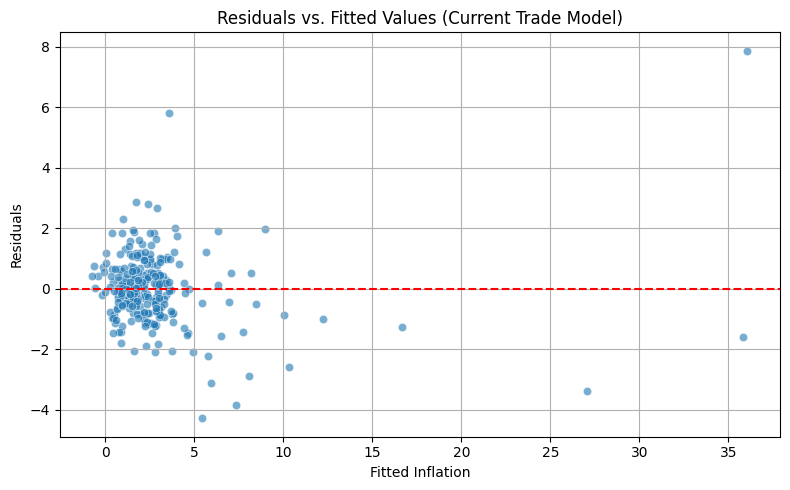

In [ ]:

panel_clean = panel_clean.reset_index().copy()

#The required format for the PanelOLS structure(Entity, time)
panel_clean = panel_clean.set_index(['Country', 'Year'])

#Defining the independent and dependent variables
X = panel_clean[['Trade',
                 'Lagged_Inflation',
                 'GDP growth (annual %)',
                 'Foreign direct investment, net inflows (% of GDP)',
                 'General government final consumption expenditure (annual % growth)',
                 'Official exchange rate (LCU per US$, period average)']]
import statsmodels.api as sm
X = sm.add_constant(X)
y = panel_clean['Inflation']

#Fitting a two-way fixed effects model with robust standart errors
from linearmodels.panel import PanelOLS
model = PanelOLS(y, X, entity_effects=True, time_effects=True)
results = model.fit(cov_type='clustered', cluster_entity=True)

#Here we are extracting the residuals and fitted vallues
panel_clean['residuals'] = results.resids.values
panel_clean['fitted'] = results.fitted_values.values

#Plotting residuals vs. fitted values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(data=panel_clean, x='fitted', y='residuals', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Fitted Values (Current Trade Model)')
plt.xlabel('Fitted Inflation')
plt.ylabel('Residuals')
plt.grid(True)
plt.tight_layout()
plt.show()


Lag plot of residuals

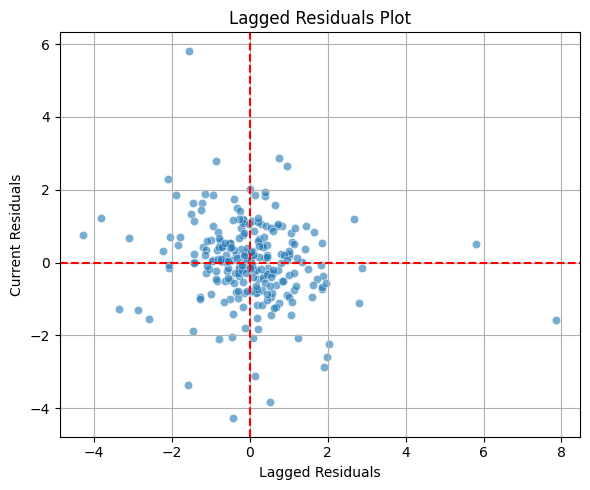

In [ ]:
#Creating a another copy so the we dont mess with the original data or alter it
panel_lagged_int = panel_clean.copy()

#Sorting the data to ensure that lags are calculated in order within each country
panel_lagged_int = panel_lagged_int.sort_values(by=['Country', 'Year'])

#Creating residual lag by country
panel_lagged_int['residuals_lag'] = panel_lagged_int.groupby('Country')['residuals'].shift(1)

#Dropping missing values(first year pear country)
resid_lagged = panel_lagged_int.dropna(subset=['residuals_lag'])

#Plotting
plt.figure(figsize=(6, 5))
sns.scatterplot(data=resid_lagged, x='residuals_lag', y='residuals', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.axvline(0, color='red', linestyle='--')
plt.title('Lagged Residuals Plot')
plt.xlabel('Lagged Residuals')
plt.ylabel('Current Residuals')
plt.grid(True)
plt.tight_layout()
plt.show()



Cluster standart errors by year



In [ ]:



#Refitting the model with Fixed Effects
from linearmodels.panel import PanelOLS
model = PanelOLS(y, X, entity_effects=True, time_effects=True)

#CLuster errors by year
results = model.fit(cov_type='clustered', cluster_time=True)


print(results.summary)



                          PanelOLS Estimation Summary                           
Dep. Variable:              Inflation   R-squared:                        0.8371
Estimator:                   PanelOLS   R-squared (Between):              0.9855
No. Observations:                 260   R-squared (Within):               0.7554
Date:                Tue, May 27 2025   R-squared (Overall):              0.8314
Time:                        21:38:47   Log-likelihood                   -420.58
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      190.18
Entities:                          20   P-value                           0.0000
Avg Obs:                       13.000   Distribution:                   F(6,222)
Min Obs:                       13.000                                           
Max Obs:                       13.000   F-statistic (robust):             49.918
                            

Excluding Hungary


In [ ]:
#Loading the data set but excluding Hungary
df = pd.read_csv("table2.csv")
df = df[(df['Country'] != 'Hungary') & (df['Year'] < 2022)].copy()

#Here we are again recaltulating the interaction term
df['Trade_Euro'] = df['Trade'] * df['EuroDummy']

#Setting up the panel structure
df = df.set_index(['Country', 'Year'])

#Defining our independent variables
X = df[['Trade',
        'Trade_Euro',
        'Lagged_Inflation',
        'GDP growth (annual %)',
        'Foreign direct investment, net inflows (% of GDP)',
        'General government final consumption expenditure (annual % growth)',
        'Official exchange rate (LCU per US$, period average)']]
#Adding a constant term , two-way fixed effects model and clustering standart erros by country
import statsmodels.api as sm
X = sm.add_constant(X)
y = df['Inflation']

#Estimating the Model
from linearmodels.panel import PanelOLS
model = PanelOLS(y, X, entity_effects=True, time_effects=True)
results = model.fit(cov_type='clustered', cluster_entity=True)


print(results.summary)



                          PanelOLS Estimation Summary                           
Dep. Variable:              Inflation   R-squared:                        0.8430
Estimator:                   PanelOLS   R-squared (Between):              0.9188
No. Observations:                 247   R-squared (Within):               0.7576
Date:                Tue, May 27 2025   R-squared (Overall):              0.8107
Time:                        21:38:50   Log-likelihood                   -400.30
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      160.37
Entities:                          19   P-value                           0.0000
Avg Obs:                       13.000   Distribution:                   F(7,209)
Min Obs:                       13.000                                           
Max Obs:                       13.000   F-statistic (robust):             311.48
                            

In [ ]:
#Loading our data set
df = pd.read_csv("table2.csv")

#Dropping Slovakia and the year 2022.
df = df[(df['Country'] != 'Slovak Republic') & (df['Year'] < 2022)].copy()

#Creating the interaction term
df['Trade_Euro'] = df['Trade'] * df['EuroDummy']

#Again setting panel indexes
df = df.set_index(['Country', 'Year'])

#Defining our independent Variables
X = df[['Trade',
        'Trade_Euro',
        'Lagged_Inflation',
        'GDP growth (annual %)',
        'Foreign direct investment, net inflows (% of GDP)',
        'General government final consumption expenditure (annual % growth)',
        'Official exchange rate (LCU per US$, period average)']]
X = sm.add_constant(X)
y = df['Inflation']

#Estimating panel regression with entity & time fixed effects
model = PanelOLS(y, X, entity_effects=True, time_effects=True)
results = model.fit(cov_type='clustered', cluster_entity=True)

print(results.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:              Inflation   R-squared:                        0.8651
Estimator:                   PanelOLS   R-squared (Between):              0.9049
No. Observations:                 247   R-squared (Within):               0.7762
Date:                Tue, May 27 2025   R-squared (Overall):              0.8195
Time:                        21:38:52   Log-likelihood                   -378.98
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      191.51
Entities:                          19   P-value                           0.0000
Avg Obs:                       13.000   Distribution:                   F(7,209)
Min Obs:                       13.000                                           
Max Obs:                       13.000   F-statistic (robust):             1845.3
                            

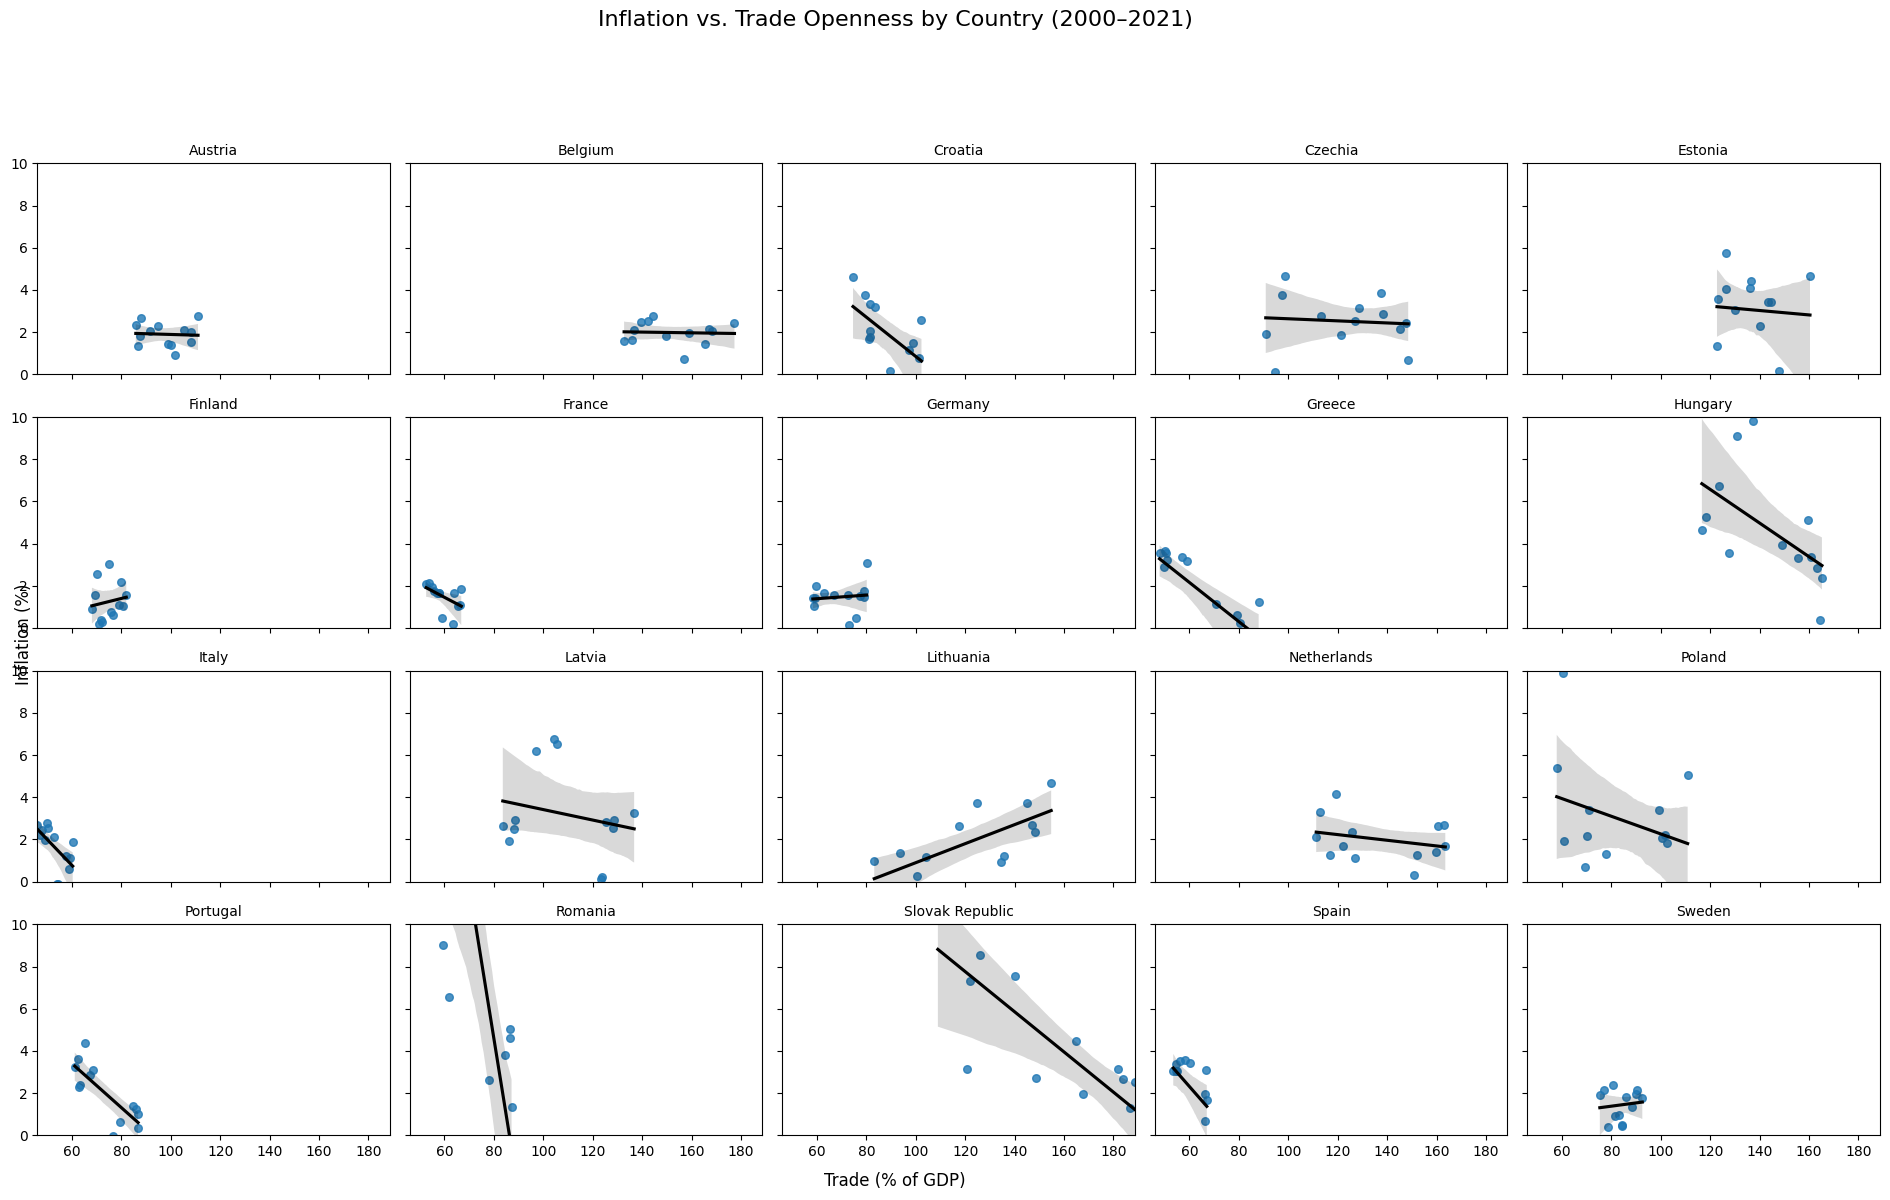

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Loading our data set.
df = pd.read_csv("table2.csv")
df = df[df['Year'] < 2022].copy()

#Just to be sure renaming "Country Name" to "Country"
if 'Country Name' in df.columns:
    df.rename(columns={'Country Name': 'Country'}, inplace=True)

#Setting up the plot grid
countries = df['Country'].unique()
num_countries = len(countries)
cols = 5
rows = (num_countries + cols - 1) // cols

#Creating the plot Grid
fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 3), sharex=True, sharey=True)
axes = axes.flatten()

#Setting Axis limits
ymin, ymax = 0, 10
xmin, xmax = df['Trade'].min(), df['Trade'].max()

#Plotting each country
for i, country in enumerate(countries):
    ax = axes[i]
    subset = df[df['Country'] == country]
    sns.regplot(data=subset, x='Trade', y='Inflation', ax=ax,
                scatter_kws={'s': 30}, line_kws={'color': 'black'})
    ax.set_title(country, fontsize=10)
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.set_xlabel('')
    ax.set_ylabel('')

#Removing any various unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

#Adding here coomon axis, labels and title.
fig.text(0.5, 0.04, 'Trade (% of GDP)', ha='center', fontsize=12)
fig.text(0.06, 0.5, 'Inflation (%)', va='center', rotation='vertical', fontsize=12)
plt.suptitle('Inflation vs. Trade Openness by Country (2000–2021)', fontsize=16, y=1.02)

plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])
plt.show()
